In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
patient_df=pd.read_csv('../pcms_hackathon_data/train/patient.csv')
risk_df=pd.read_csv('../pcms_hackathon_data/train/risk.csv')

In [3]:
patient_df['hot_spotter_readmission_flag'] = (patient_df['hot_spotter_readmission_flag'] == 't').astype(int)
patient_df['hot_spotter_chronic_flag'] = (patient_df['hot_spotter_chronic_flag'] == 't').astype(int)

patient_df['hot_spotter_identified_at'] = pd.to_datetime(
    patient_df['hot_spotter_identified_at'], errors='coerce'
)
patient_df.loc[patient_df['hot_spotter_identified_at'] < '1900-01-01', 'hot_spotter_identified_at'] = pd.NaT

patient_df['has_hotspot_flag'] = patient_df['hot_spotter_identified_at'].notna().astype(int)

today = pd.to_datetime('2025-11-01')  
patient_df['days_since_hotspot_identified'] = (
    today - patient_df['hot_spotter_identified_at']
).dt.days.replace([np.inf, np.nan], 0)


print(patient_df.head())
print("\nColumn types:\n", patient_df.dtypes)


   patient_id  age hot_spotter_identified_at  hot_spotter_readmission_flag  \
0         291   56                2025-03-01                             0   
1         306   42                       NaT                             0   
2         310   71                2025-03-01                             0   
3         315   49                       NaT                             0   
4         318   25                       NaT                             0   

   hot_spotter_chronic_flag  has_hotspot_flag  days_since_hotspot_identified  
0                         0                 1                          245.0  
1                         0                 0                            0.0  
2                         0                 1                          245.0  
3                         0                 0                            0.0  
4                         0                 0                            0.0  

Column types:
 patient_id                               

Correlation with risk_score:
risk_score                       1.000000
has_hotspot_flag                 0.469457
days_since_hotspot_identified    0.468084
age                              0.292966
hot_spotter_chronic_flag         0.250035
hot_spotter_readmission_flag     0.061194
patient_id                      -0.016482
Name: risk_score, dtype: float64


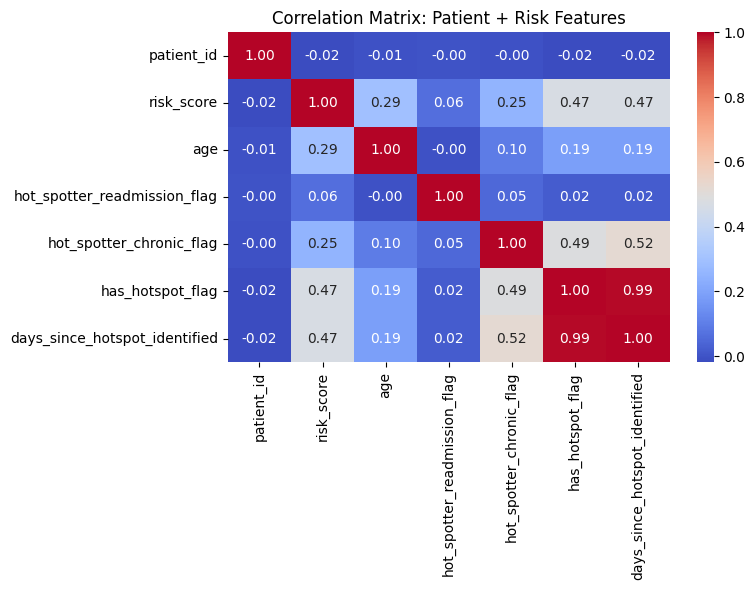

In [4]:
merged_patient_risk = risk_df.merge(patient_df, on='patient_id', how='left')

merged_patient_risk.fillna({
    'age': 0,
    'hot_spotter_identified_at': 0,
    'hot_spotter_readmission_flag': 0,
    'hot_spotter_chronic_flag': 0,
    'has_hotspot_flag': 0,
    'days_since_hotspot_identified': 0
}, inplace=True)

corr_matrix = merged_patient_risk.corr(numeric_only=True)

risk_corr = corr_matrix['risk_score'].sort_values(ascending=False)
print("Correlation with risk_score:")
print(risk_corr)

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Patient + Risk Features")
plt.tight_layout()
plt.show()


In [5]:
output_path = "risk_patient.csv"
merged_patient_risk.to_csv(output_path, index=False)
print(f"File saved successfully: {output_path}")


File saved successfully: risk_patient1.csv
